In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# ***Data-Transformation***

In [16]:
df=sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


<Axes: xlabel='fare', ylabel='Count'>

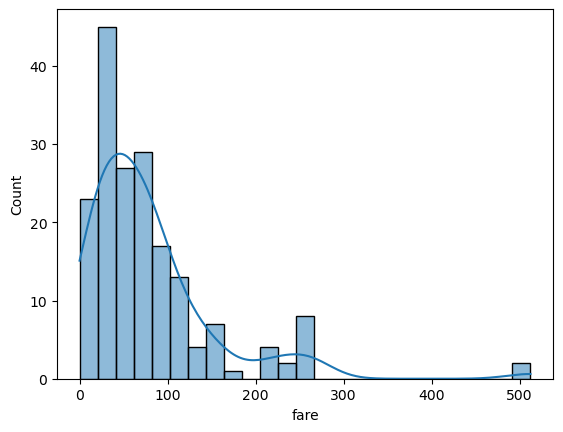

In [17]:
df = sns.load_dataset('titanic')
df = df.dropna()

# Plot histograms
sns.histplot(df['fare'], kde=True)

# *Checking Skewness*

In [18]:
print(df[['fare']].skew())


fare    2.707368
dtype: float64


# Power Transformer Are Use For Those Columns Which Have Skewness

# ****Yeo-Johnson****

In [19]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(standardize=False,method='yeo-johnson')
pt.fit(df[['fare']])
df['fare'] = pt.transform(df[['fare']])


0.039489663999603505

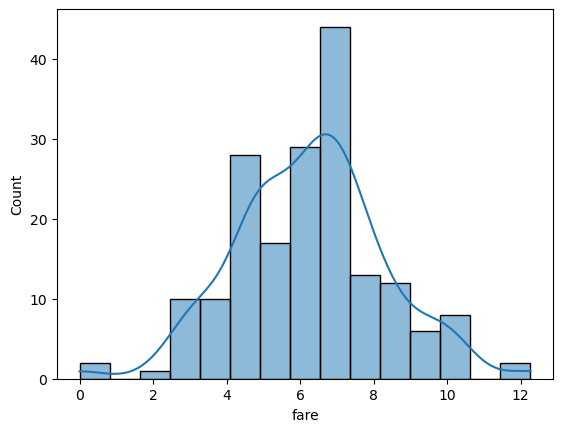

In [20]:
sns.histplot(df['fare'], kde=True)
df['fare'].skew()

# ****Box-Cox****

<Axes: xlabel='fare', ylabel='Count'>

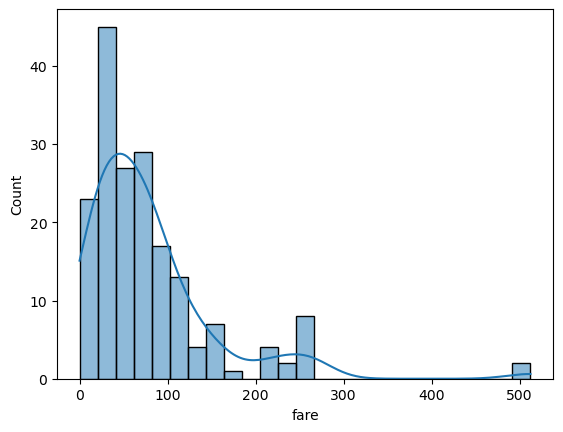

In [21]:
df = sns.load_dataset('titanic')
df = df.dropna()

# Plot histograms
sns.histplot(df['fare'], kde=True)

In [22]:
df = df[df['fare'] > 0]


In [23]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(standardize=False,method='box-cox')
pt.fit(df[['fare']])
df['fare'] = pt.transform(df[['fare']])


-0.0027759515687449574

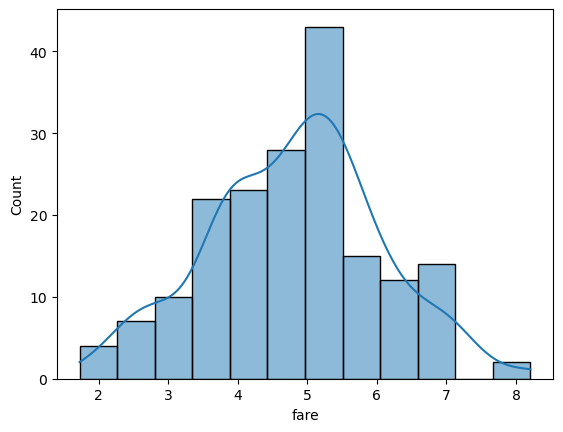

In [24]:
sns.histplot(df['fare'], kde=True)
df['fare'].skew()

# ***Quantile Transformation***

<Axes: xlabel='fare', ylabel='Count'>

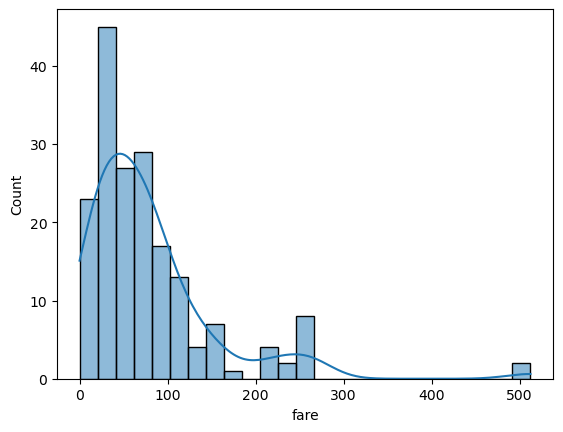

In [25]:
df = sns.load_dataset('titanic')
df = df.dropna()

# Plot histograms
sns.histplot(df['fare'], kde=True)

-0.00281744489769662

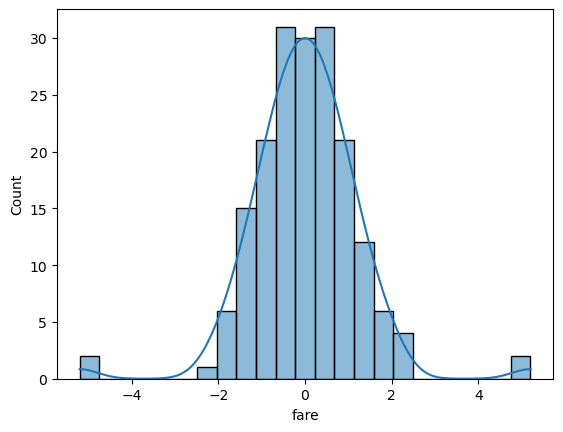

In [26]:
from sklearn.preprocessing import QuantileTransformer

qt = QuantileTransformer(output_distribution='normal')
qt.fit(df[['fare']])
df['fare'] = qt.transform(df[['fare']])
sns.histplot(df['fare'], kde=True)
df['fare'].skew()

In [27]:
df['fare'].skew()

-0.00281744489769662